## Esame di Metodi Numerici 6 Maggio 2024 

## Esercizo 1
- Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``'test_14_09_2023.mat'``.  Risolvere il sistema confrontando almeno due tra i metodi  visti  per utilizzare per risolvere il sistema lineare con tale matrice dei coefficienti. Confrontare i risultati dei vari metodi, e giustificare i loro comportamento utilizzando i risultati teorici visti a lezione.
- 
Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('test_06_05_2024.mat')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``


                                       [10 punti]
                                         


In [9]:
from scipy.io import loadmat
import numpy as np
import scipy.linalg as spl
import numpy.linalg as npl
import Schel_FULL as sf

dati = loadmat('test_06_05_2024.mat')
A=dati["A"] 
A=A.astype(float)
b=dati["b"] 
b=b.astype(float)

#Using LU decomposition

PT, L, U = spl.lu(A)
P = PT.T.copy()
x, flag = sf.LUsolve(P,A,L,U,b)

print(x)

x0 = 2*np.ones_like(b)

x, it, er_vet = sf.jacobi(A,b,x0, 1e-12, 2000)


print("Soluzione con jacobi =",x)
print("Numero di iterazioni con jacobi = ",it)


[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

- Data la matrice 
$$A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],$$
Richiamare le ipotesi sotto cui esiste la fattorizzazione di Gauss senza pivoting e scrivere un codice per  verificarle.

                                                [2 punti]

In [10]:

def check_gaussian_no_pivoting(A):
    """
    Controlla se la fattorizzazione di Gauss senza pivoting è possibile
    verificando che tutti i minori principali della matrice siano diversi da zero.
    
    Args:
    A (np.array): Matrice quadrata da controllare.
    
    Returns:
    bool: True se la fattorizzazione di Gauss senza pivoting è possibile, False altrimenti.
    """
    n = A.shape[0]
    for k in range(1, n+1):
        # Estrae la sottomatrice principale di ordine k
        Ak = A[:k, :k]
        det = np.linalg.det(Ak)
        print(f"Determinante del minore principale {k}x{k}: {det:.2f}")
        if np.isclose(det, 0):
            return False
    return True

A = np.array([
    [1,2,3,4],
    [2,-4,6,8],
    [-1,-2,-3,-1],
    [5,7,0,1]
])

print(check_gaussian_no_pivoting(A))

Determinante del minore principale 1x1: 1.00
Determinante del minore principale 2x2: -8.00
Determinante del minore principale 3x3: 0.00
False


## Esercizio 2
Scrivere uno script che calcoli il polinomio interpolante un insieme di punti $P_i =(x_i, y_i)$ $i = 0, ..., n $ nella forma di Lagrange, $n=5,10,15,18$

- nodi $x_i$, punti equidistanti in un intervallo $[a, b]$,
- nodi $x_i$, zeri dei polinomi di Chebyshev nell'intervallo $[a, b]$, ossia
$$
x_i = \frac{(a + b)}{2}+\frac{(b-a)}{2} \, \cos \left(
\frac{(2i+1)\pi}{2(n + 1)}
\right), \quad  i =0, ..., n 
$$
 
  e $y_i = f(x_i)$ ottenuti dalla valutazione nei punti $x_i$ della funzione test   $f: \ [a, b] \rightarrow {\mathbb R}$. 
  - $f(x) = 1/(1+25*x^2)$,  $ \quad x \in [-1, 1]$ (funzione di Runge).
  
                                          [6] punti

- Calcolare l'errore di interpolazione $r(x) =  f(x)-pe(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $pe(x)$ calcolato a partire da nodi equdisitanti.
                                        [1] punto
                                        
Visualizzare il grafico di $f(x)$ e $pe(x)$, ed il grafico di $|r(x)|$ per ogni valore $n=5,10,15,18$ 

                                        [1] punto
                                        
Calcolare l'errore di interpolazione $r(x) =  f(x)-pc(x) $,
tra la funzione test $f(x)$ e il polinomio di interpolazione $p(x)$ calcolato a partire da nodi di Chebichev.

                                      [1] punto
                                            
Visualizzare il grafico di $f(x)$ e $pc(x)$, ed il grafico di $|r(x)|$. 

                                       [1] punto

Cosa si osserva? Cosa accade all'aumentare del grado $n$ di $p(x)$? Scrivere la formula dell'errore che si compie quando al posto della funzione che ha generato i dati si considera il polinomio interpolatore di grado n e commentarla.
                                         
                                         [3 punti]

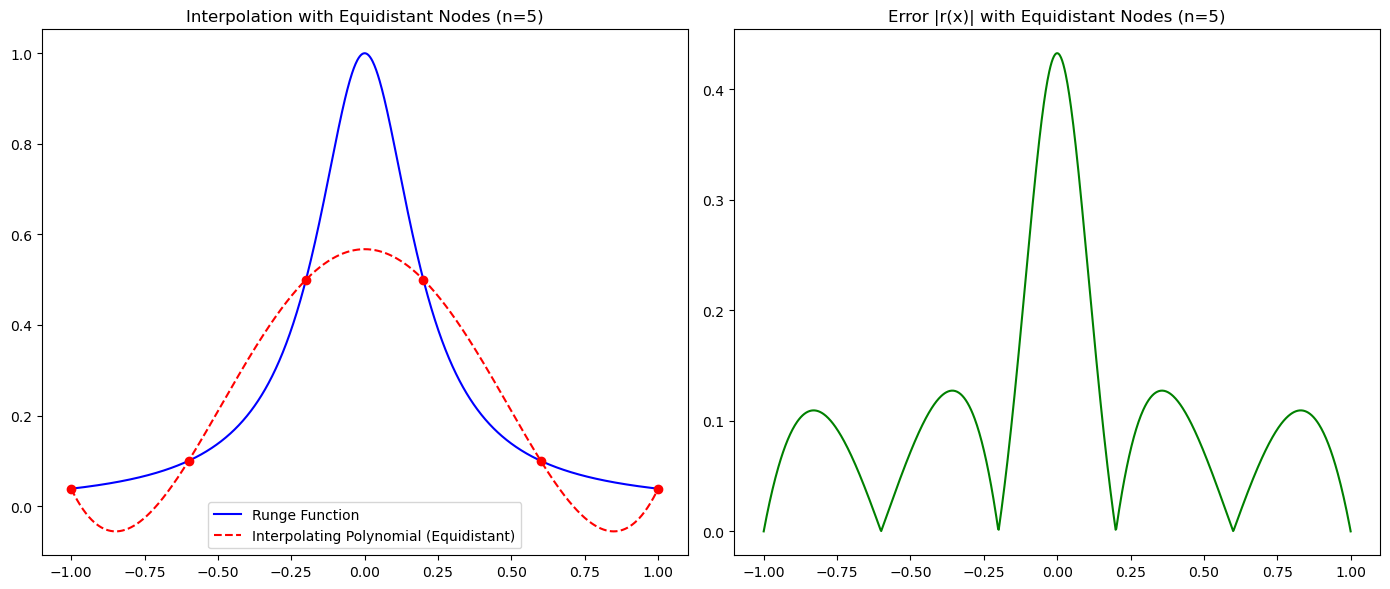

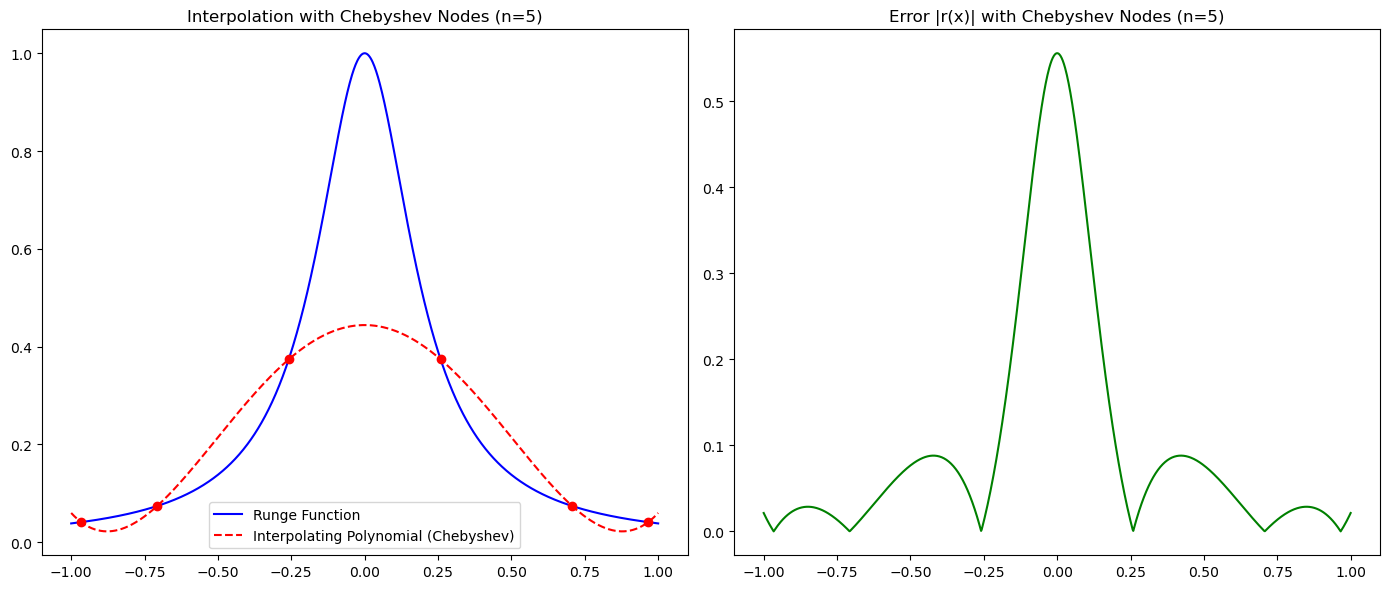

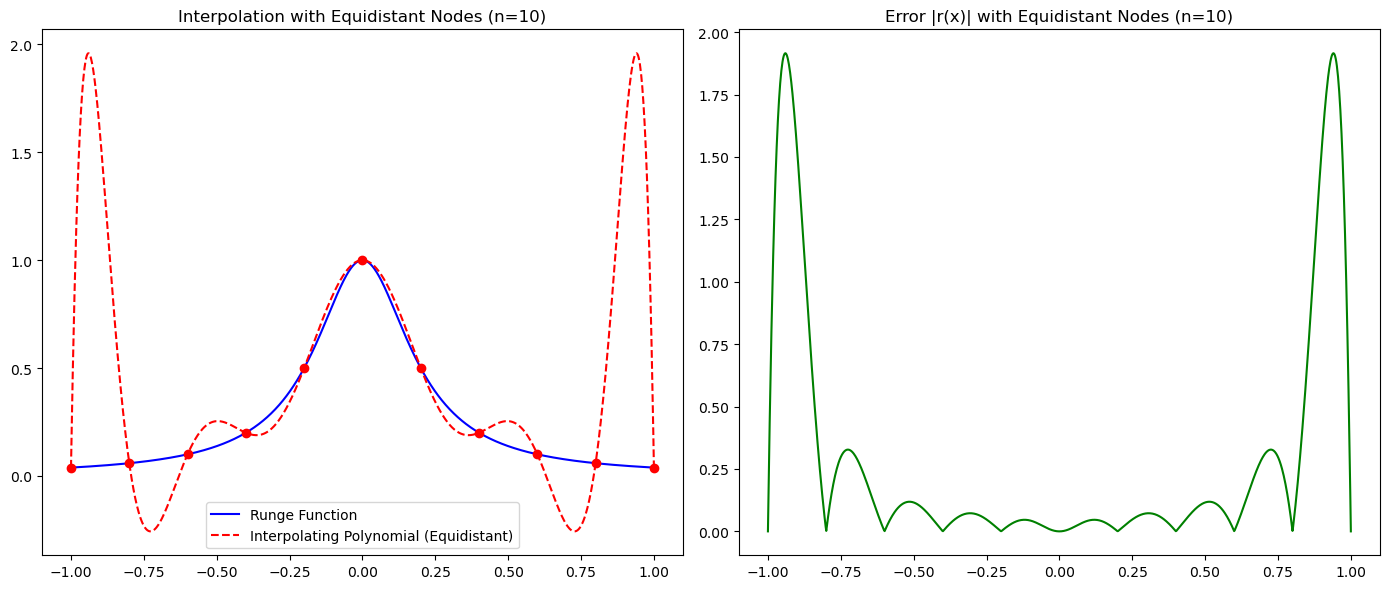

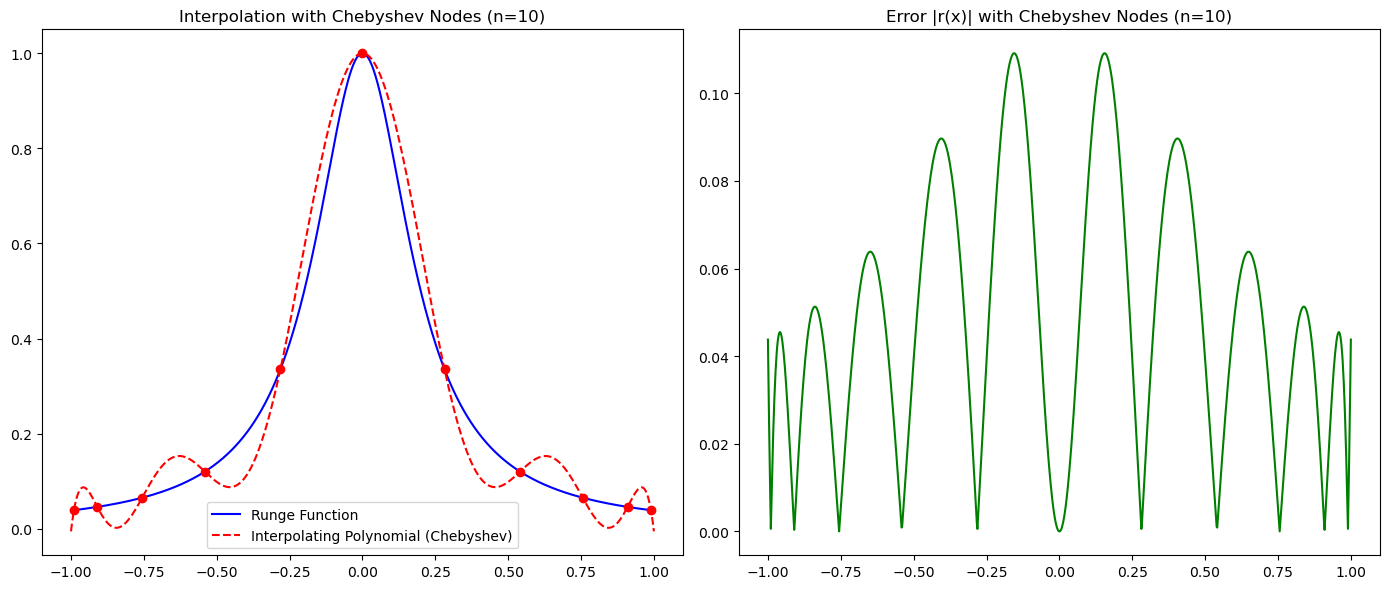

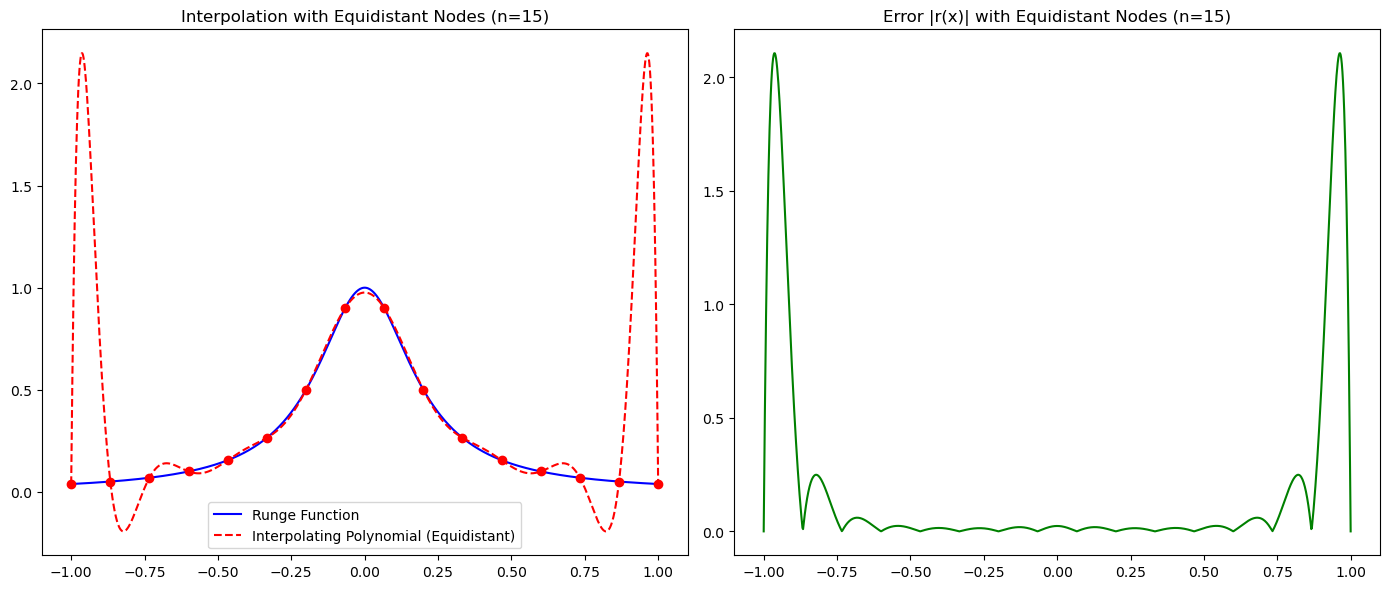

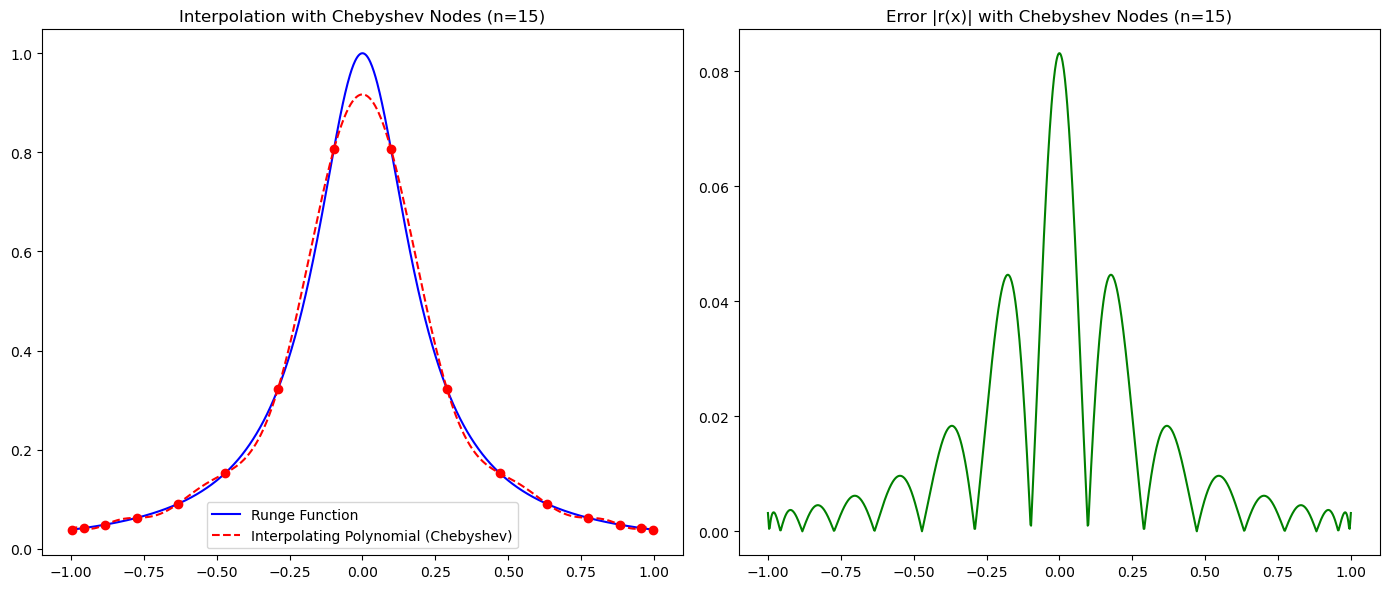

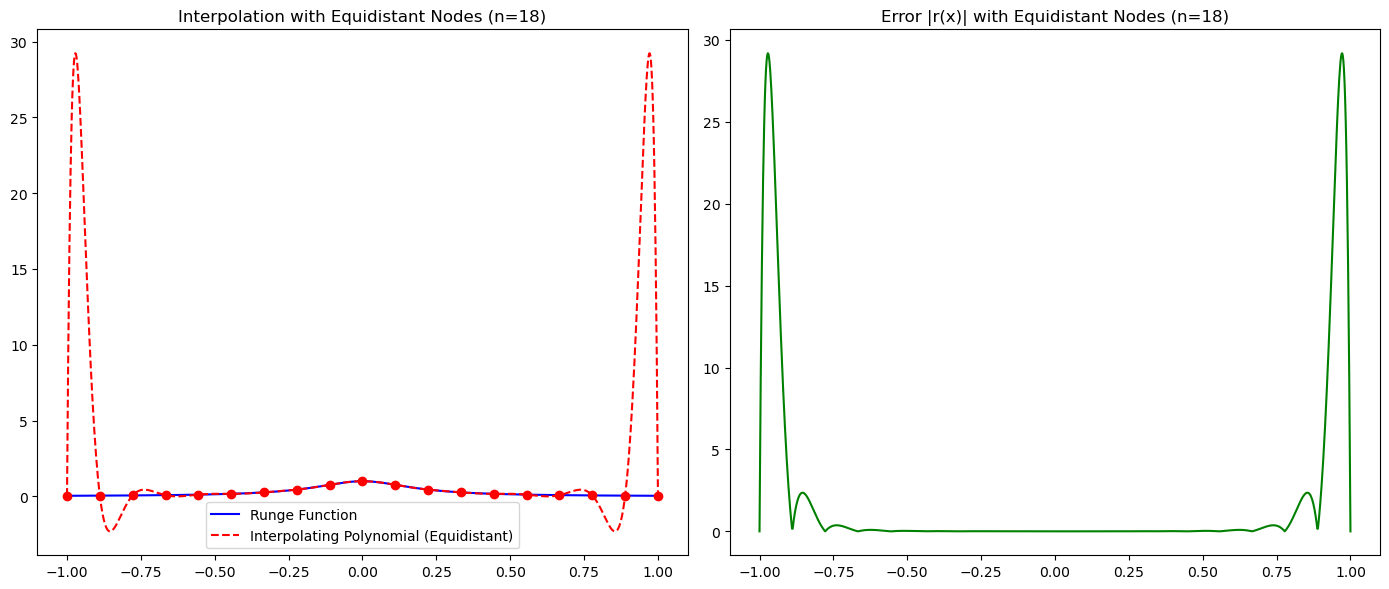

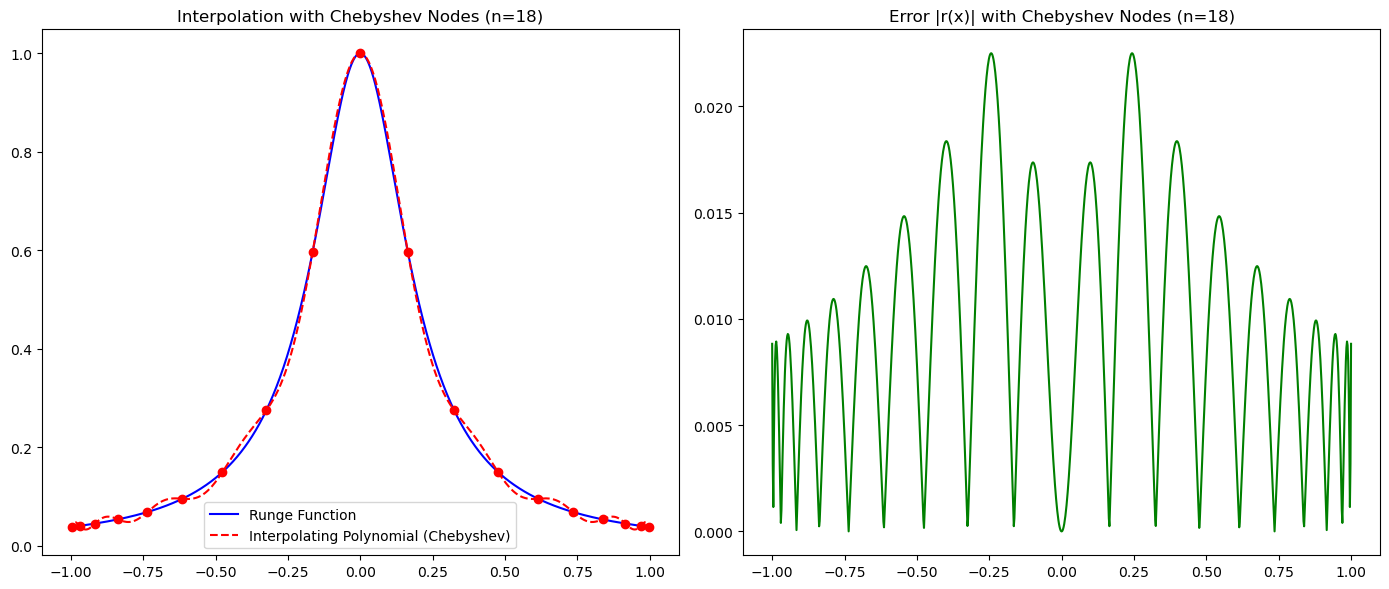

In [12]:
import matplotlib.pyplot as plt

def chebyshev_nodes(a, b, n):
    i = np.arange(n + 1)
    return (a + b)/2 + (b - a)/2 * np.cos((2*i + 1) * np.pi / (2 * (n + 1)))

def equidistant_nodes(a, b, n):
    return np.linspace(a, b, n + 1)

# Set the interval and define the function
a, b = -1, 1
runge = lambda x : 1 / (1 + 25 * x**2)

# Values of n
n_values = [5, 10, 15, 18]
xx = np.linspace(a, b, 1000)  # High-resolution grid for plotting

# Plot results for each n
for n in n_values:
    # Equidistant nodes
    x_equidistant = equidistant_nodes(a, b, n)
    y_equidistant = runge(x_equidistant)
    
    # Chebyshev nodes
    x_chebyshev = chebyshev_nodes(a, b, n)
    y_chebyshev = runge(x_chebyshev)
    
    # Interpolating polynomials
    p_equidistant = sf.InterpL(x_equidistant, y_equidistant, xx)
    p_chebyshev = sf.InterpL(x_chebyshev, y_chebyshev, xx)
    
    # Interpolation errors
    error_equidistant = runge(xx) - p_equidistant
    error_chebyshev = runge(xx) - p_chebyshev
    
    # Plotting
    plt.figure(figsize=(14, 6))
    
    # Plot for equidistant nodes
    plt.subplot(1, 2, 1)
    plt.plot(xx, runge(xx), 'b', label='Runge Function')
    plt.plot(xx, p_equidistant, 'r--', label='Interpolating Polynomial (Equidistant)')
    plt.plot(x_equidistant, y_equidistant, 'ro')
    plt.title(f'Interpolation with Equidistant Nodes (n={n})')
    plt.legend()
    
    # Error plot for equidistant nodes
    plt.subplot(1, 2, 2)
    plt.plot(xx, np.abs(error_equidistant), 'g')
    plt.title(f'Error |r(x)| with Equidistant Nodes (n={n})')
    
    plt.tight_layout()
    plt.show()

    # Plot for Chebyshev nodes
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(xx, runge(xx), 'b', label='Runge Function')
    plt.plot(xx, p_chebyshev, 'r--', label='Interpolating Polynomial (Chebyshev)')
    plt.plot(x_chebyshev, y_chebyshev, 'ro')
    plt.title(f'Interpolation with Chebyshev Nodes (n={n})')
    plt.legend()
    
    # Error plot for Chebyshev nodes
    plt.subplot(1, 2, 2)
    plt.plot(xx, np.abs(error_chebyshev), 'g')
    plt.title(f'Error |r(x)| with Chebyshev Nodes (n={n})')
    
    plt.tight_layout()
    plt.show()


**Domanda AI**

- Descrivere gli elementi caratterizzanti di un MultiLayer Perceptron (MLP).( Com'è fatto un neurone artificiale, a caso servono le funzioni di attivazione, come sono organizzati i neuroni. Varie tipologie di reti MLP)  ed accennare in cosa consiste la fase di forward propagation e la fase di backward propagation. **Punti: 1**

- Ottimizzazione della loss function per il training di una rete neurale per il task di regressione: Metodo di discesa del gradiente, metodo stocastico del gradiente, metodo del gradiente minibatch.  **Punti 1**  
 - Non convessità della loss-function - come non rimanere bloccati in un monimo locale? Metodo del gradiente con momentum. **Punti 2**
- Learning rate scheduling: step decay, decadimento esponenziale, decadimento dipendente dal tempo. **Punti 1**
 - Learning rate adattivo: Adagrad, RMSProp, Adadelta, Adam. **Punti 2**
 
 **Totale:  7**

### MultiLayer Perceptron (MLP)
#### Struttura di un Neurone Artificiale
Un neurone artificiale, l'elemento di base di una rete neurale, è modellato sulla base del neurone biologico. È costituito dai seguenti elementi:
- **Pesi (Weights)**: Ogni input al neurone è moltiplicato per un peso che indica l'importanza relativa di quell'input.
- **Sommatore (Summation)**: Gli input pesati sono sommati insieme.
- **Bias**: Un termine di bias viene aggiunto alla somma per spostare la funzione di attivazione in modo da consentire alla rete di modellare i dati in modo più accurato.
- **Funzione di Attivazione**: Una funzione non lineare applicata alla somma ponderata degli input. Le funzioni di attivazione comuni includono la funzione sigmoide, ReLU (Rectified Linear Unit), e tangente iperbolica.

#### Funzioni di Attivazione
Le funzioni di attivazione sono cruciali perché introducono non linearità nel modello, permettendo alla rete neurale di apprendere modelli complessi. Senza una funzione di attivazione non lineare, l'MLP si comporterebbe come un semplice modello lineare, anche con più strati.

#### Organizzazione dei Neuroni
In un MLP, i neuroni sono organizzati in strati:
- **Strato di Input**: Il primo strato della rete, che riceve i dati grezzi.
- **Strati Nascosti**: Questi strati elaborano gli input; possono esserci uno o più strati nascosti, ciascuno con un certo numero di neuroni.
- **Strato di Output**: Lo strato finale, che fornisce l'output della rete.

#### Tipologie di Reti MLP
- **MLP Standard**: Un MLP classico è un feedforward neural network, in cui i dati passano dallo strato di input allo strato di output senza cicli.
- **Deep Neural Networks (DNNs)**: Quando un MLP ha molti strati nascosti, viene chiamato "deep," ed è capace di apprendere rappresentazioni più complesse.

### Forward Propagation e Backward Propagation
- **Forward Propagation**: Durante la forward propagation, gli input vengono passati attraverso i vari strati della rete. In ogni strato, vengono applicati i pesi, i bias, e la funzione di attivazione. Il risultato finale è l'output della rete, che viene confrontato con il target per calcolare la loss.
  
- **Backward Propagation**: La backpropagation è il processo di aggiornamento dei pesi della rete in base all'errore commesso. Viene calcolato il gradiente della funzione di perdita rispetto ai pesi, e i pesi vengono aggiornati utilizzando il metodo della discesa del gradiente.

### Ottimizzazione della Loss Function
- **Metodo della Discesa del Gradiente (Gradient Descent)**: Un metodo iterativo per minimizzare la funzione di perdita, aggiornando i pesi nella direzione opposta al gradiente della funzione di perdita.
  
- **Metodo Stocastico del Gradiente (SGD)**: Una variante della discesa del gradiente dove ogni aggiornamento dei pesi è fatto utilizzando un singolo campione, il che può accelerare il processo ma introduce rumore nelle stime del gradiente.
  
- **Metodo del Gradiente Minibatch**: Combina i vantaggi del batch gradient descent e dell'SGD, aggiornando i pesi basati su un piccolo lotto di campioni invece che su un singolo campione o sull'intero dataset.

### Non Convessità della Loss-Function e Momentum
La funzione di perdita in una rete neurale è spesso non convessa, il che significa che può avere molti minimi locali. Per evitare di rimanere bloccati in un minimo locale:
- **Metodo del Gradiente con Momentum**: Introduce un termine che accelera l'aggiornamento dei pesi lungo le direzioni in cui il gradiente è costante, riducendo le oscillazioni e aiutando a superare i minimi locali.

### Learning Rate Scheduling
Il learning rate è un parametro che controlla l'entità degli aggiornamenti dei pesi. Un learning rate troppo alto può far oscillare l'algoritmo, mentre uno troppo basso rallenta la convergenza.
- **Step Decay**: Il learning rate viene ridotto di un fattore fisso ogni volta che il numero di epoche raggiunge un certo valore.
- **Decadimento Esponenziale**: Il learning rate viene ridotto in modo esponenziale nel corso del tempo.
- **Decadimento Dipendente dal Tempo**: Il learning rate diminuisce proporzionalmente all'inverso del tempo.

### Learning Rate Adattivo
Metodi avanzati per adattare il learning rate automaticamente durante l'addestramento:
- **Adagrad**: Adatta il learning rate per ogni parametro, basandosi sulla somma dei quadrati dei gradienti precedenti.
- **RMSProp**: Modifica Adagrad per mantenere la somma dei gradienti in una finestra mobile, evitando che il learning rate diventi troppo piccolo.
- **Adadelta**: Ulteriore miglioramento di RMSProp, elimina la necessità di specificare manualmente un learning rate iniziale.
- **Adam**: Combina i vantaggi di RMSProp e del metodo del momentum, mantenendo una media mobile sia del gradiente che del quadrato del gradiente. Adam è uno dei metodi più popolari per l'ottimizzazione delle reti neurali.

['/home/siralex/anaconda3/lib/python3.11/site-packages']
